In [111]:
## 2 - Install Python Pandas, NumPy, and SciPy Library.
import pandas as pd

In [112]:
## 3 - Import "Purchases.csv"
purchase = pd.read_csv('Purchases.csv')
print("The five first row of the dataset are:\n", purchase.head())

The five first row of the dataset are:
   Purchase_Id Purchase_Date     Customer_Name   Age  Sex Payment_Type  \
0       T0001    2020-11-18      Karen Hughes   NaN  NaN  Credit Card   
1       T0002    2023-02-20     Leslie Turner  29.0    m         Cash   
2       T0003    2023-02-27        Cody Oneal  70.0    f         Cash   
3       T0004    2022-08-24      Jason Butler  77.0    m  Credit Card   
4       T0005    2021-01-02  Rodney Gutierrez  59.0    m  Credit Card   

      Item   Price  Quantity                Email_Address  
0   Laptop  1200.0       5.0       sarahallen@example.org  
1   Laptop  1200.0       5.0     dustinprince@example.com  
2  Printer   200.0       4.0          jesus85@example.net  
3    Mouse    30.0       NaN  alexandergreene@example.com  
4   Laptop  1200.0       4.0          david29@example.net  


In [113]:
## 4 - Handling duplicates: Find the number of duplicate rows.
print("\nThe numbe of duplicates are:", purchase.duplicated().sum())


The numbe of duplicates are: 30


In [114]:
## 5 - Find duplicate rows based on column: Customer_Name.
duplicate1=purchase[purchase.duplicated('Customer_Name')]
print(duplicate1)

    Purchase_Id Purchase_Date      Customer_Name   Age  Sex Payment_Type  \
353       T0354    2021-01-08       Carrie Smith  32.0    m         Cash   
500       T0086    2021-06-07      Bryan Hampton  24.0    m       PayPal   
501       T0159    2021-12-09     Robert Johnson  41.0    m         Cash   
502       T0286    2020-12-09    Sandra Robinson  69.0  NaN       PayPal   
503       T0185    2023-11-08    Cynthia Freeman  37.0    m  Credit Card   
504       T0138    2022-04-10     Justin Wallace  52.0    m  Credit Card   
505       T0150    2023-10-21        Eric Jordan  35.0    m         Cash   
506       T0356    2020-04-01  Brandon Jefferson  18.0    f  Credit Card   
507       T0383    2023-02-10        Cynthia Lee  80.0    f  Credit Card   
508       T0113    2022-07-12         Shawn Chen  80.0    f       PayPal   
509       T0463    2024-03-01      George Bowers  51.0    f         Cash   
510       T0310    2022-06-08       Damon Dawson  44.0    m         Cash   
511       T0

In [115]:
## 6 - Drop duplicates.
purchase.drop_duplicates(inplace = True)

In [116]:
### 7 - Verify action was successful.
print('\nDuplicates still present = ', purchase.duplicated().any())


Duplicates still present =  False


In [117]:
## 8 - Handling missing values: Find total NaN count per column.
print("\nThe total numbers of missing values are:\n", purchase.isna().sum())


The total numbers of missing values are:
 Purchase_Id       0
Purchase_Date     0
Customer_Name     0
Age              57
Sex              51
Payment_Type      0
Item              0
Price            62
Quantity         48
Email_Address    49
dtype: int64


In [118]:
## Create a copy of the dataset before correcting missing values
before_correction = purchase.copy()

## 9 - Fill NaN values with the mean value for Age column.
purchase['Age'] = purchase['Age'].fillna(purchase['Age'].mean())

In [119]:
## 10 - Fill NaN values with the mode value forPayment_Type Age column.
purchase['Payment_Type'] = purchase['Payment_Type'].fillna(purchase['Payment_Type'].mode()[0])

In [120]:
## 11 - Remove Phone_Number column.
print("\nBefore dropping Phone_Number col:", purchase.columns)
purchase = purchase.drop('Phone_Number', axis=1)
print("\nAfter dropping Phone_number col:", purchase.columns)


Before dropping Phone_Number col: Index(['Purchase_Id', 'Purchase_Date', 'Customer_Name', 'Age', 'Sex',
       'Payment_Type', 'Item', 'Price', 'Quantity', 'Email_Address'],
      dtype='object')


KeyError: "['Phone_Number'] not found in axis"

In [121]:
### 12 - Verify action was successful.
print('\nNaN count after imputing and dropping:')
print(purchase.isna().sum())


NaN count after imputing and dropping:
Purchase_Id       0
Purchase_Date     0
Customer_Name     0
Age               0
Sex              51
Payment_Type      0
Item              0
Price            62
Quantity         48
Email_Address    49
dtype: int64


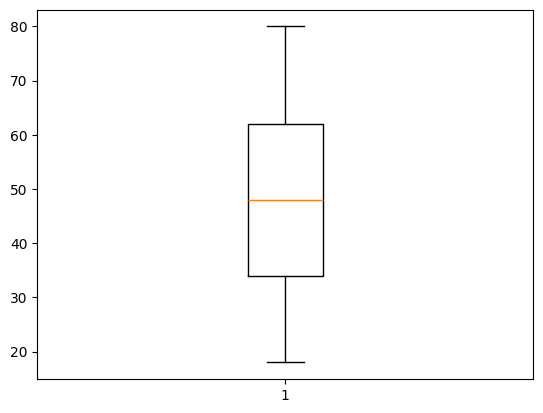

In [122]:
## 13 - Handling missing values: Boxplot
import matplotlib.pyplot as plt

## 14 - Plot Age values in a boxplot to identify outliers.
plt.boxplot(purchase['Age'])
plt.show()

In [123]:
## 15 - Handling missing values: Z-score
import numpy as np
from scipy import stats

## 16 - Calculate the z-score.
z = np.abs(stats.zscore(purchase['Age']))
print("\nThe Zscore statistics for age are:\n")
print(z)


The Zscore statistics for age are:

[4.17810677e-16 1.11882370e+00 1.29204294e+00 1.70365431e+00
 6.45225058e-01 1.53043508e+00 1.16010430e-01 1.76564158e+00
 9.42418826e-01 4.17810677e-16 1.29204294e+00 2.95600947e-01
 8.83617200e-01 1.46844781e+00 6.45225058e-01 4.13204198e-01
 4.68820182e-01 1.23324131e+00 4.17810677e-16 6.03944459e-02
 4.13204198e-01 1.05683644e+00 1.52724944e+00 8.83617200e-01
 1.29522858e+00 1.76564158e+00 4.68820182e-01 1.53043508e+00
 1.58605106e+00 6.48410699e-01 4.17810677e-16 1.76564158e+00
 9.39233185e-01 1.05683644e+00 4.72005823e-01 3.54402572e-01
 1.05683644e+00 6.45225058e-01 1.76245594e+00 1.11882370e+00
 4.17810677e-16 1.41283183e+00 9.98034810e-01 1.35084456e+00
 7.66013950e-01 4.17810677e-16 4.17810677e-16 1.70683995e+00
 8.83617200e-01 1.29204294e+00 8.21629934e-01 8.24815575e-01
 1.11882370e+00 1.06002208e+00 4.10018557e-01 4.17810677e-16
 1.17762533e+00 1.76245594e+00 4.68820182e-01 1.17443969e+00
 7.07212324e-01 2.36799322e-01 1.53043508e+00 6.

In [124]:
## 17 - Define threshold and find outliers.
# Define a threshold for outliers
threshold = 1

# Find outliers
outlier = np.where(z > threshold)[0]
print('\nOutlier are in rows:', outlier)


Outlier are in rows: [  1   2   3   5   7  10  13  17  21  22  24  25  27  28  31  33  36  38
  39  41  43  47  49  52  53  56  57  59  62  65  74  76  80  82  83  85
  87  92  93  95  96  97  98 101 102 108 112 116 119 120 122 125 126 127
 130 131 133 134 136 138 140 141 142 143 146 148 152 153 156 157 159 162
 166 167 169 171 172 173 175 179 181 182 186 187 188 189 191 192 194 195
 196 200 203 204 205 211 213 214 215 218 223 224 225 229 231 234 242 244
 246 248 249 251 255 257 260 261 262 264 266 269 270 274 283 285 286 287
 291 307 308 310 312 313 316 317 327 328 337 338 339 340 341 343 344 346
 347 349 350 355 359 362 366 370 372 373 375 376 377 380 381 382 387 389
 391 393 394 395 401 404 406 408 410 412 414 415 418 421 422 431 433 434
 441 442 446 449 450 452 453 455 461 467 469 471 472 473 480 482 490]


In [125]:
## 18 - Drop outliers
purchase = purchase.drop(outlier)
print(purchase.columns)

Index(['Purchase_Id', 'Purchase_Date', 'Customer_Name', 'Age', 'Sex',
       'Payment_Type', 'Item', 'Price', 'Quantity', 'Email_Address'],
      dtype='object')


In [127]:
## 19 - Using .replace() method: Replace negative values with their positive equivalents in Price column.
purchase['Price'] = purchase['Price'].replace(['-1150', '-30'], ['1150', '30'])

In [128]:
## 20 - Print new dataframe (without outliers)
print('\nNew dataset without outlier:')
print(purchase)


New dataset without outlier:
    Purchase_Id Purchase_Date     Customer_Name        Age  Sex Payment_Type  \
0         T0001    2020-11-18      Karen Hughes  48.027088  NaN  Credit Card   
4         T0005    2021-01-02  Rodney Gutierrez  59.000000    m  Credit Card   
6         T0007    2023-10-30  Patricia Griffin  50.000000    m       PayPal   
8         T0009    2024-01-13     Nancy Coleman  32.000000  NaN  Credit Card   
9         T0010    2021-12-25       Amber Stout  48.027088    m  Credit Card   
..          ...           ...               ...        ...  ...          ...   
495       T0496    2020-11-20    Denise Navarro  57.000000    f  Credit Card   
496       T0497    2022-07-04    Jennifer Jones  53.000000    f       PayPal   
497       T0498    2021-01-04     Robert Oliver  35.000000    f       PayPal   
498       T0499    2023-05-16   Aaron Hernandez  59.000000    f         Cash   
499       T0500    2020-05-29   Shelley Bradley  48.027088    m  Credit Card   

         

In [129]:
## 21 - Handling inconsistent data: Convert Customer_Name column to title case.
purchase['Customer_Name'] = purchase['Customer_Name'].str.title()


In [130]:
## 22 - Convert Sex column to upper case.
purchase['Sex'] = purchase['Sex'].str.upper()

In [133]:
## - Convert Purchase_Date column from string to datetime.
purchase['Purchase_Date'] = pd.to_datetime(purchase['Purchase_Date'])

In [134]:
## 24 - Print the cleaned dataframe.
print('Our cleaned datafame is:')
print(purchase)

Our cleaned datafame is:
    Purchase_Id Purchase_Date     Customer_Name        Age  Sex Payment_Type  \
0         T0001    2020-11-18      Karen Hughes  48.027088  NaN  Credit Card   
4         T0005    2021-01-02  Rodney Gutierrez  59.000000    M  Credit Card   
6         T0007    2023-10-30  Patricia Griffin  50.000000    M       PayPal   
8         T0009    2024-01-13     Nancy Coleman  32.000000  NaN  Credit Card   
9         T0010    2021-12-25       Amber Stout  48.027088    M  Credit Card   
..          ...           ...               ...        ...  ...          ...   
495       T0496    2020-11-20    Denise Navarro  57.000000    F  Credit Card   
496       T0497    2022-07-04    Jennifer Jones  53.000000    F       PayPal   
497       T0498    2021-01-04     Robert Oliver  35.000000    F       PayPal   
498       T0499    2023-05-16   Aaron Hernandez  59.000000    F         Cash   
499       T0500    2020-05-29   Shelley Bradley  48.027088    M  Credit Card   

           Ite